In [185]:
import glob
import tqdm
from PIL import Image
from collections import Counter
from torchvision.transforms import RandomCrop, ToTensor, ToPILImage, Resize

In [17]:
path = './dataset/train/*.png'
path_test = './dataset/test/*.png'

In [4]:
shapes = []
for file in tqdm.tqdm(glob.glob(path)):
    img = Image.open(file)
    shapes.append(img.size)

shapes_test = []
for file in tqdm.tqdm(glob.glob(path_test)):
    img = Image.open(file)
    shapes_test.append(img.size)

100%|██████████| 109237/109237 [00:03<00:00, 29486.76it/s]


In [142]:
len(shapes)

109237

In [147]:
len(out)

104368

In [139]:
max([sh[0] for sh in shapes]), max([sh[1] for sh in shapes])

(5314, 7531)

In [19]:
ratios = [sh[0]/sh[1]  for i,sh in enumerate(shapes)]
ratios_test = [sh[0]/sh[1]  for i,sh in enumerate(shapes_test)]

In [36]:
delete_this_idx = [i for i, v in enumerate(ratios) if v < 1/3] + [i for i, v in enumerate(ratios) if v > 3]

In [39]:
all_pathes_train = glob.glob(path)
delete_this_image = [all_pathes_train[idx] for idx in delete_this_idx]

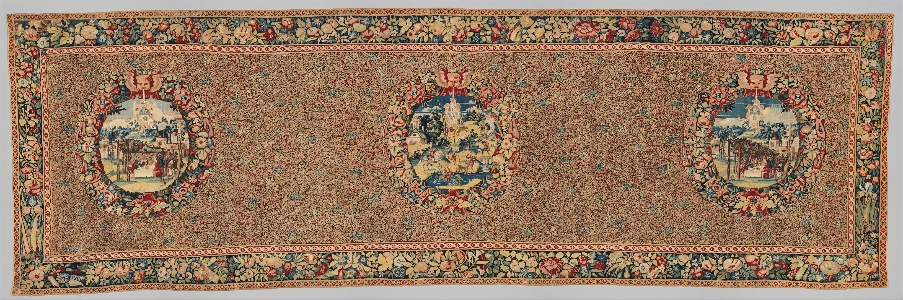

In [184]:
img = Image.open(random.choice(delete_this_image))
img

In [149]:
img.size

(1779, 300)

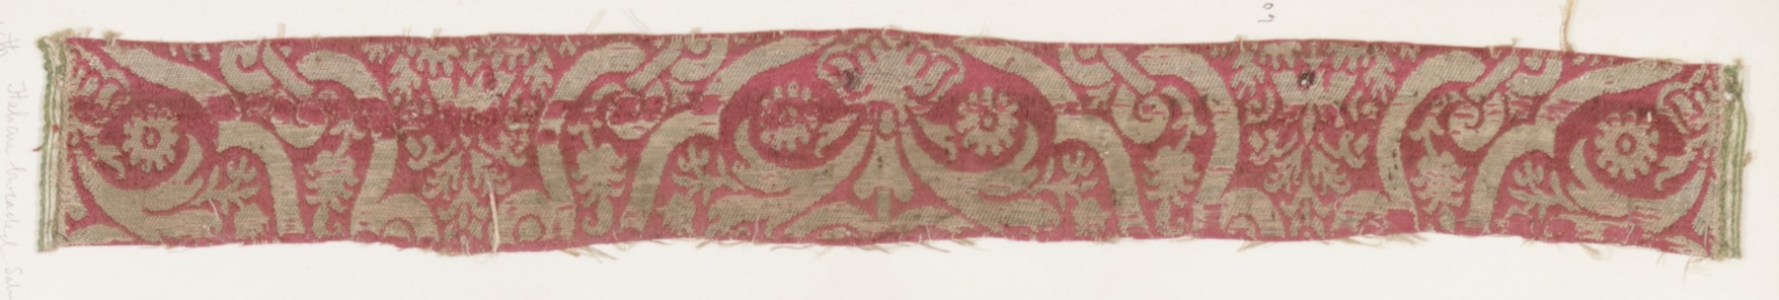

In [120]:
def show(idx):
    p = glob.glob(path)[idx]
    img = Image.open(p)
    return img

# for i,shape in enumerate(shapes):
#     if shape == (300, 1228):
#         break
img = show(11271)
img

In [126]:
img.size

(1779, 300)

In [187]:
totensor = ToTensor()
topilimage = ToPILImage()
randomcrop = RandomCrop(300)
resize = Resize(288, Image.BILINEAR)

In [191]:
randomcrop(img).size

(300, 300)

In [192]:
resize(randomcrop(img)).size

(288, 288)

In [ ]:
import numpy as np
import random
from matplotlib import pyplot as plt

plt.hist(ratios, bins = 40, alpha=0.5)
plt.show();
plt.hist(ratios_test, bins = 40, alpha=0.5)

plt.show();

In [259]:
def f2_loss(predict, target):
    tp = (predict * target).sum(-1)
    fp = predict.sum(-1)
    fn = target.sum(-1)
    
    p = tp / (fp)
    r = tp / (fn)
    beta = 2
    f2 = (1 + beta**2) * p * r/(beta**2*p + r)
    f2 = f2.sum(0)
    return -f2

In [260]:
predict = np.array([[1,1,1,0,1],[1,1,1,0,1]])
target = np.array([[0,1,1,0,0],[0,1,1,0,0]])

In [261]:
f2_loss(predict, target)

-1.6666666666666667

In [248]:
from sklearn.metrics import fbeta_score

In [249]:
fbeta_score(target, predict,2)

0.8333333333333334

In [252]:
# fp sum is not correct
# tp * is not correcty
predict * target

array([[0, 1, 1, 0, 0],
       [0, 1, 1, 0, 0]])